In [1]:
class ImportImages:
  
    def __init__(self, folder=r"D:\DATASET\FRuites\fruits-360_dataset\fruits-360\Training\Pineapple"):
        import os
        import cv2
        self.folder=folder
        file_list2=os.listdir(folder)
        image_list2=[]
        for file in file_list2:
            if file.endswith(".jpg") or file.endswith(".png") or file.endswith(".jpeg") or file.endswith(".JPG") or file.endswith(".PNG") or file.endswith(".JPEG") or file.endswith(".jfif") or file.endswith(".JFIF") or file.endswith(".bmp") or file.endswith(".BMP") :
                try:image_list2.append(folder+"\\"+file)
                except:pass
                    
        #print(image_list[0])
        #x=cv2.imread(image_list[0])
        self.imagelist=image_list2
        all_images2=[]
        #print(x.shape)
        second_images2=[]
        for image in image_list2:
            all_images2.append(cv2.imread(image))
        self.all_images2=all_images2
        self.images=all_images2
   
    
    
    def resize(self,size=(100,100) ): 
        import cv2
   
        self.resized_images2 = []
        for images in self.all_images2:
            new_image=cv2.resize(images, (100, 100))
            self.resized_images2.append(new_image)
        return self.resized_images2


    def allimages(self):
        return self.images

        
    def show_image(self,img=False,img_num=False):
        import matplotlib.pyplot as plt
        if img:
             # import the matplotlib library
            plt.imshow(img,cmap='gray') # display the image array with the gray color map
            plt.show() # show the plot
            
            
        elif img_num:
            try:
                plt.imshow(self.images[img_num],cmap='gray') # display the image array with the gray color map
                plt.show() # show the plot
            except:
                print('list index out of range,suck dick')


and image classification  simple MLP model in the frutis dataset 


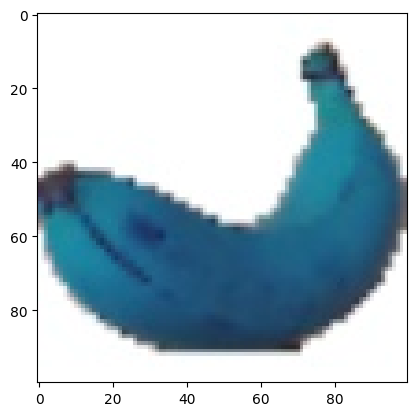

In [2]:


folder=r"D:\DATASET\FRuites\fruits-360_dataset\fruits-360\DATA TEST\Banana"
hello=ImportImages(folder=folder)
hello.show_image(img_num=70)


In [90]:
import tensorflow as tf
folder1="D:\\DATASET\\FRuites\\fruits-360_dataset\\fruits-360\\DATA TEST"
folder2=r"D:\DATASET\FRuites\fruits-360_dataset\fruits-360\DATA TRAIN"

test_ds=tf.keras.utils.image_dataset_from_directory(
    directory=folder1
    ,labels='inferred'
    ,color_mode='grayscale'
    
)

train_ds=tf.keras.utils.image_dataset_from_directory(
    directory=folder2 
    ,labels='inferred'
    ,color_mode='grayscale',
    batch_size=32,
    
    
)

Found 980 files belonging to 2 classes.
Found 1312 files belonging to 2 classes.


In [ ]:
reshaped_labels = []
for images, labels in train_ds:
    # Reshape labels to match the expected shape [batch_size, num_classes]
    labels = tf.reshape(labels, (-1, 1))  # Assuming num_classes=2
    reshaped_labels.append(labels)

# Create a new dataset with reshaped labels
reshaped_train_ds = tf.data.Dataset.from_tensor_slices((images, reshaped_labels))

In [ ]:
model= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
    tf.keras.layers.Conv2D(filters=3,kernel_size=3,activation='relu'),
    tf.keras.layers.Conv2D(filters=7,kernel_size=3,activation='relu'),
    tf.keras.layers.Dense(units=70,activation='relu'),
    tf.keras.layers.Dense(units=2,activation='softmax')
    ]
)

loss = tf.keras.losses.Hinge()
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,metrics=['accuracy'],loss='BinaryCrossentropy')
model.fit(train_ds)

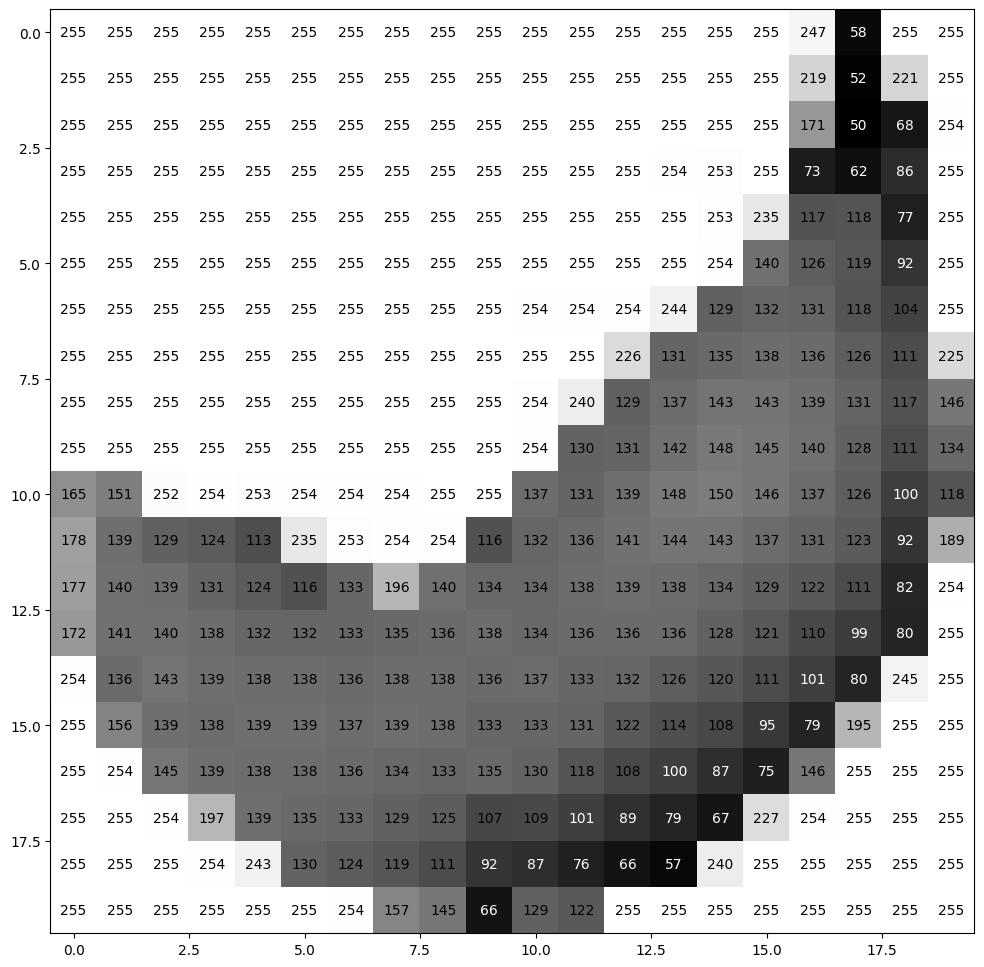

In [3]:
import matplotlib.pyplot as plt
import cv2
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)

img=cv2.imread(r"D:\DATASET\FRuites\fruits-360_dataset\fruits-360\DATA TRAIN\Banana\1_100.jpg")

#img=cv2.imread(r"C:\Users\defaultuser0.LAPTOP-LRB3T941\Downloads\e-Jibaku-Shounen-Hanako-Kun-2076x1734px-1016.jpg")

img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img=cv2.resize(img,(20,20))
visualize_input(img, ax)
#devisualize_input(img, ax)
